<a href="https://colab.research.google.com/github/aishani1903/Data-Analysis-Projects/blob/main/Height_and_House_Data_Analysis_using_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('heights.csv')
df

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1
5,amit,6.4
6,amita,6.5
7,anil,1.2
8,sudha,6.0
9,ram,5.1


#detect outlier using percentile

In [ ]:
#detect outlier using percentile
max_threshold = df['height'].quantile(0.95)   #(means 95% people have a height below 7.47999)
max_threshold

7.4799999999999995

In [ ]:
df[df['height']>max_threshold]      #to see who is more than the quantile

,name,height
11,ramesh,8.0


In [ ]:
min_threshold = df['height'].quantile(0.05) #(5%)
min_threshold

3.6050000000000004

In [ ]:
df[df['height']<min_threshold]      #to see who is less than the quantile

,name,height
7,anil,1.2


#remove the outlier

In [ ]:
#remove the outlier 
df[df['height']<max_threshold]
df[df['height']>min_threshold]

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1
5,amit,6.4
6,amita,6.5
8,sudha,6.0
9,ram,5.1
10,kamal,5.6


removing outlier using zscore

In [ ]:
df['zscore'] = (df['height'] - df['height'].mean())/df['height'].std()
df

,name,height,zscore
0,mohit,5.3,-0.238392
1,sakshi,5.2,-0.301363
2,arun,5.1,-0.364335
3,varun,4.9,-0.490278
4,ani,7.1,0.895094
5,amit,6.4,0.454294
6,amita,6.5,0.517265
7,anil,1.2,-2.820220
8,sudha,6.0,0.202408
9,ram,5.1,-0.364335


#Bengaluru house data


In [ ]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


Removing outliers using quantiles

In [ ]:
#finding outliers
min_threshold, max_threshold = df['price'].quantile([0.0001, 0.9999])
min_threshold, max_threshold

(8.625864, 2874.8271999998833)

In [ ]:
df[df['price']<min_threshold]  

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00
11569,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.44


In [ ]:
df[df['price']>max_threshold]  

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
11080,Super built-up Area,18-Jan,Ashok Nagar,4 BHK,NaN,8321,5.0,2.0,2912.0
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,NaN,7150,13.0,NaN,3600.0


In [ ]:
new_df = df[(df['price']>min_threshold) & (df['price']<max_threshold)]
new_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
new_df.shape

(13316, 9)

In [ ]:
new_df.describe

<bound method NDFrame.describe of                   area_type   availability  ... balcony   price
0      Super built-up  Area         19-Dec  ...     1.0   39.07
1                Plot  Area  Ready To Move  ...     3.0  120.00
2            Built-up  Area  Ready To Move  ...     3.0   62.00
3      Super built-up  Area  Ready To Move  ...     1.0   95.00
4      Super built-up  Area  Ready To Move  ...     1.0   51.00
...                     ...            ...  ...     ...     ...
13315        Built-up  Area  Ready To Move  ...     0.0  231.00
13316  Super built-up  Area  Ready To Move  ...     NaN  400.00
13317        Built-up  Area  Ready To Move  ...     1.0   60.00
13318  Super built-up  Area         18-Jun  ...     1.0  488.00
13319  Super built-up  Area  Ready To Move  ...     1.0   17.00

[13316 rows x 9 columns]>

Removing the outlier using z score

In [ ]:
import seaborn as sns

In [ ]:
relation = new_df.corr()

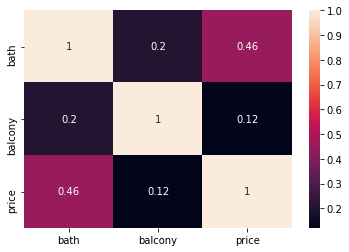

In [ ]:
sns.heatmap(relation, annot=True)

In [ ]:
new_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
new_df['zscore'] = (new_df['price'] - new_df['price'].mean())/new_df['price'].std()
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.507714
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.054851
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.348322
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.118930
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.424785
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,0.826440
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,2.001202
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,-0.362224
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,2.612913
